In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install -U imbalanced-learn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7105
Precision: 0.6718
Recall: 0.7105
F1-score: 0.6612


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.00      0.00      0.00       132
     Minor Crash       0.61      0.32      0.42      3765
Non-Injury Crash       0.73      0.96      0.83      8822
   Serious Crash       0.45      0.11      0.17       981

        accuracy                           0.71     13700
       macro avg       0.45      0.35      0.36     13700
    weighted avg       0.67      0.71      0.66     13700



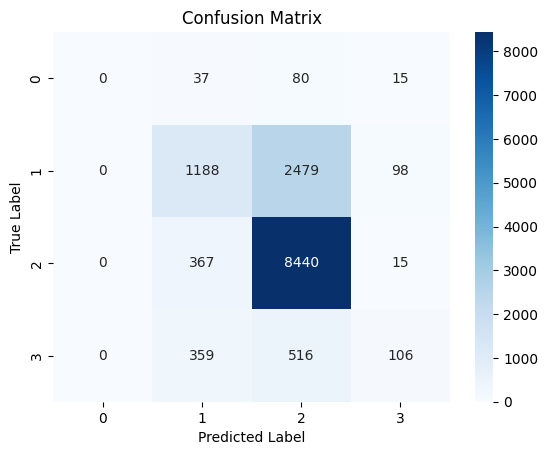

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Initialize an empty list to store the rows
rows = []

# Open the file and read it with the csv.reader
try:
    with open(csv_file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            rows.append(row)
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

# Convert the list of rows to a DataFrame if rows were read successfully
if rows:
    data = pd.DataFrame(rows[1:], columns=rows[0])

    # Selecting relevant features for the model
    features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
                'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
                'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
                'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
                'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
                'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
                'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
                'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

    # Ensure only the relevant columns are used
    data = data[features]

    # Convert categorical variables to numerical using one-hot encoding
    X = pd.get_dummies(data.drop('Crash severity', axis=1))
    y = data['Crash severity']

    # Split data into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to balance the training data
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Initialize the Random Forest Classifier with default hyperparameters
    rf_clf = RandomForestClassifier(random_state=42)

    # Train the model on the entire training set
    rf_clf.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics with four decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 16}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6951
Precision: 0.6662
Recall: 0.6951
F1-score: 0.6237


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.00      0.00      0.00       132
     Minor Crash       0.66      0.20      0.30      3765
Non-Injury Crash       0.70      0.98      0.82      8822
   Serious Crash       0.45      0.11      0.17       981

        accuracy                           0.70     13700
       macro avg       0.45      0.32      0.32     13700
    weighted avg       0.67      0.70      0.62     13700



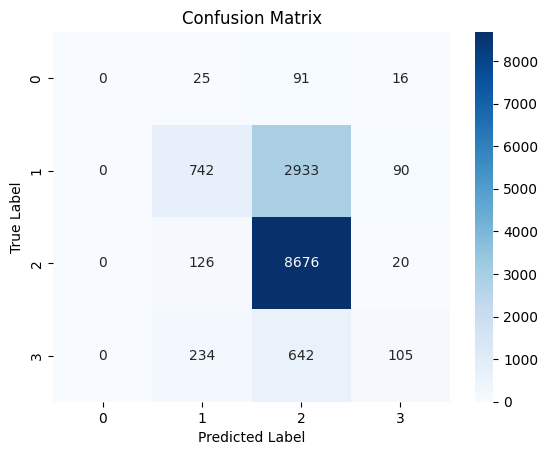

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint  # Import randint
import matplotlib.pyplot as plt
import seaborn as sns




from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Initialize an empty list to store the rows
rows = []

# Open the file and read it with the csv.reader
try:
    with open(csv_file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            rows.append(row)
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

# Convert the list of rows to a DataFrame if rows were read successfully
if rows:
    data = pd.DataFrame(rows[1:], columns=rows[0])
 # Selecting relevant features for the model
    features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
                'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
                'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
                'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
                'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
                'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
                'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
                'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

    # Ensure only the relevant columns are used
    data = data[features]

    # Separating the target variable before applying one-hot encoding
    target_variable = 'Crash severity'
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Convert categorical variables to numerical using one-hot encoding
    X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Use only 25% of the training data for hyperparameter tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.99, random_state=42)

# Define a hyperparameter distribution instead of a fixed grid
param_dist = {
    'max_depth': [None] + list(range(5, 21)),  # Range of depths including 'None'
    'min_samples_split': randint(2, 20),  # Random integers between 2 and 20
    'min_samples_leaf': randint(1, 10),  # Random integers between 1 and 10
    'criterion': ['gini', 'entropy']  # Both criteria
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_clf, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_sample, y_train_sample)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Decision Tree Classifier with best hyperparameters
dt_clf_best = DecisionTreeClassifier(random_state=42, **best_params)




# Train the model on the full training set
dt_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf_best.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics with four decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9173502331327696, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9173502331327696
[LightGBM] [Warning] bagging_fraction is set=0.8542698063547792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8542698063547792
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9173502331327696, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9173502331327696
[LightGBM] [Warning] bagging_fraction is set=0.8542698063

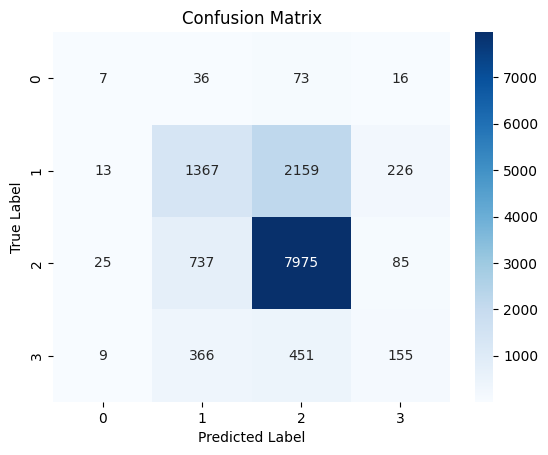

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

# Mount Google Drive (specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Read the CSV file directly into a DataFrame
try:
    data = pd.read_csv(csv_file_path)

    # Selecting relevant features for the model
    features = [ 'Number of vehicles involved', 'Crash year',
                'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
                'Regional council', 'Road category',
                'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
                'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
                'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
                'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
                'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

    data = data[features]

    # Handling missing values
    imputer_num = SimpleImputer(strategy='median')
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

    imputer_cat = SimpleImputer(strategy='most_frequent')
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

    # Label encode all categorical variables
    label_encoder = LabelEncoder()
    for column in categorical_cols:
        data[column] = label_encoder.fit_transform(data[column])

    # Separating the target variable
    target_variable = 'Crash severity'
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Define a parameter distribution for LightGBM
    param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Continuous distribution from 0.01 to 0.31
    'num_leaves': randint(20, 50),         # Integer distribution between 20 and 50
    'feature_fraction': uniform(0.8, 0.2), # Continuous distribution from 0.8 to 1.0
    'bagging_fraction': uniform(0.8, 0.2), # Continuous distribution from 0.8 to 1.0
    'bagging_freq': randint(1, 10)         # Integer distribution between 1 and 10
}
    # Use a subset of data for tuning (e.g., 25% of the training data)
    X_sample, _, y_sample, _ = train_test_split(X_train_smote, y_train_smote, test_size=0.99, random_state=42)

    # Create the LightGBM classifier
    gbm = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y_sample)), verbose=0, random_state=42)

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=3, n_jobs=-1, verbose=1, random_state=42)

    # Perform hyperparameter tuning on the training data
    random_search.fit(X_train_smote, y_train_smote)

    # Best parameters
    best_params = random_search.best_params_
    print("Best Hyperparameters:", best_params)


    # Train the model with the best parameters on the full training data
    best_gbm = lgb.LGBMClassifier(**best_params, objective='multiclass', num_class=len(np.unique(y_train_smote)), verbose=0)
    best_gbm.fit(X_train_smote, y_train_smote)

    # Predict on the test data using the best model
    y_pred = best_gbm.predict(X_test)

    # Replace numerical labels with class names
    label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
    y_test_labels = [label_mapping[label] for label in y_test]
    y_pred_labels = [label_mapping[label] for label in y_pred]

    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

    # Print the metrics with four decimal places
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Print the classification report for a detailed overview
    print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

    # Display the Confusion Matrix
    confusion = confusion_matrix(y_test_labels, y_pred_labels)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



except Exception as e:
    print(f"An error occurred while processing the CSV file: {e}")
